In [56]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
total_data = pd.merge(city_data, ride_data, on="city")

# Display the data table for preview
total_data.head()


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


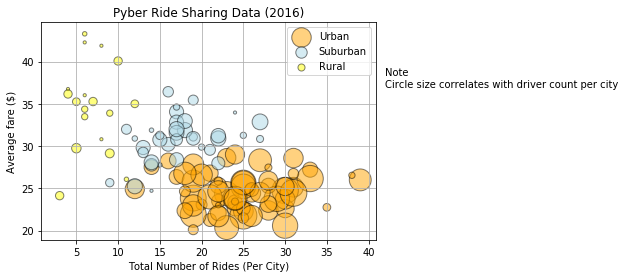

In [57]:
#Obtain the x and y coordinates for each of the three city types
grouped_data = total_data

#Scale up driveer count for visual purposes
grouped_data['driver_count'] = grouped_data['driver_count'] * 10

#Generate new columns with the mean fare and count calculated for city groups
grouped_data['city_mean_fare'] = grouped_data.groupby(['city'])['fare'].transform('mean')
grouped_data['ride_count'] = grouped_data.groupby(['city'])['fare'].transform('count')

#De-duplicate by city
grouped_data = grouped_data.drop_duplicates(subset=['city'])

urban_df = grouped_data.loc[grouped_data['type'] == 'Urban']
suburban_df = grouped_data.loc[grouped_data['type'] == 'Suburban']
rural_df = grouped_data.loc[grouped_data['type'] == 'Rural']

#Build the scatter plots for each city types
plt.scatter(urban_df['ride_count'], urban_df['city_mean_fare'], s=urban_df['driver_count'], label="Urban", facecolor = "orange", edgecolors = "black", alpha=0.5)
plt.scatter(suburban_df['ride_count'], suburban_df['city_mean_fare'], s=suburban_df['driver_count'], label="Suburban", facecolor="lightblue", edgecolors = "black", alpha=0.5)
plt.scatter(rural_df['ride_count'], rural_df['city_mean_fare'], s=rural_df['driver_count'], label="Rural", facecolor="yellow", edgecolors = "black", alpha=0.5)

#Incorporate the other graph properties
plt.grid()
plt.title("Pyber Ride Sharing Data (2016)")
plt.ylabel("Average fare ($)")
plt.xlabel("Total Number of Rides (Per City)")

#Create a legend
plt.legend()

#Incorporate a text label regarding circle size
plt.text(42, 37, "Note\nCircle size correlates with driver count per city")

#Save Figure
plt.savefig("Pyber_scatter_AC.png")

In [25]:
# Show plot
plt.show()

## Total Fares by City Type

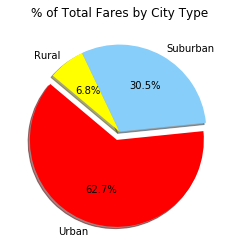

In [69]:
# Calculate Type Percents
urban_total_fare = total_data.loc[total_data['type'] == 'Urban']['fare'].sum()
suburban_total_fare = total_data.loc[total_data['type'] == 'Suburban']['fare'].sum()
rural_total_fare = total_data.loc[total_data['type'] == 'Rural']['fare'].sum()


# The values of each section of the pie chart
sizes = [urban_total_fare, suburban_total_fare, rural_total_fare]


# Build Pie Chart
# Labels for the sections of our pie chart
labels = ["Urban", "Suburban", "Rural"]


# The colors of each section of the pie chart
colors = ["red", "lightskyblue", "yellow"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)


plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Fares by City Type")
# Save Figure
plt.savefig("Pyber_Pie_Total_Fares_by_City.png")

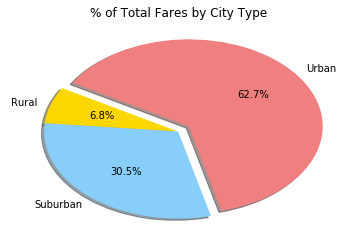

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

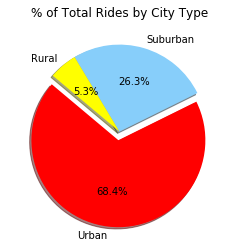

In [70]:
# Calculate Ride Percents
urban_rides = len(total_data.loc[total_data['type'] == 'Urban'])
suburban_rides = len(total_data.loc[total_data['type'] == 'Suburban'])
rural_rides = len(total_data.loc[total_data['type'] == 'Rural'])

sizes = [urban_rides, suburban_rides, rural_rides]

# Build Pie Chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Rides by City Type")
# Save Figure
plt.savefig("Pyber_Pie_Total_Rides_by_City.png")

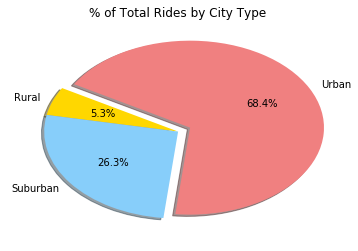

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

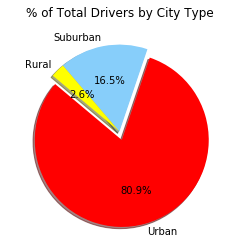

In [71]:
#De-duplicate by city
total_data_2 = total_data
total_data_2 = total_data_2.drop_duplicates(subset=['city'])

# Calculate Driver Percents
urban_total_dri = total_data_2.loc[total_data_2['type'] == 'Urban']['driver_count'].sum()
suburban_total_dri = total_data_2.loc[total_data_2['type'] == 'Suburban']['driver_count'].sum()
rural_total_dri = total_data_2.loc[total_data_2['type'] == 'Rural']['driver_count'].sum()


sizes = [urban_total_dri, suburban_total_dri, rural_total_dri]

# Build Pie Charts
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Drivers by City Type")
# Save Figure
plt.savefig("Pyber_Pie_Total_Drivers_by_City.png")

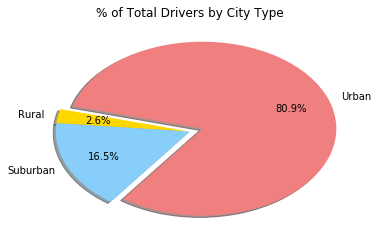

In [6]:
# Show Figure
plt.show()